In [87]:
import numpy as np
import pandas as pd

In [88]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le=LabelEncoder()

In [93]:
df['Gender']=le.fit_transform(df['Gender'])

In [94]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [95]:
import  matplotlib.pyplot as plt

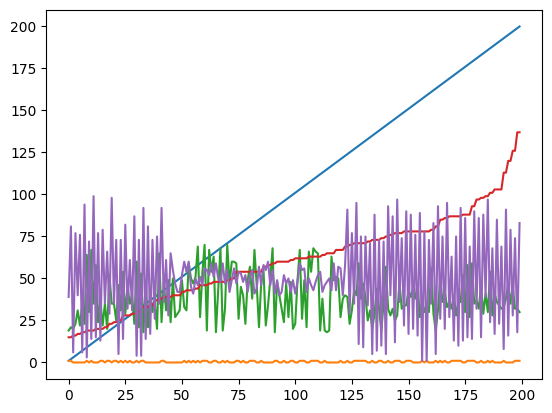

In [96]:
plt.plot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a68916ee1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a68916ee5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a68916edf00>,
 'medians': [<matplotlib.lines.Line2D at 0x7a68916eeb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a68916eeda0>,
 'means': []}

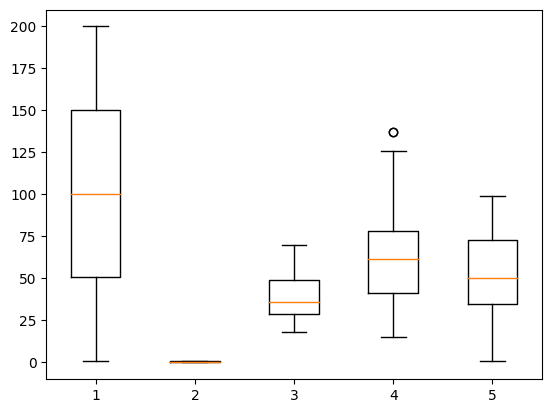

In [97]:
plt.boxplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a68915c9ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a68915ca410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a68915c9c30>],
 'medians': [<matplotlib.lines.Line2D at 0x7a68915ca950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a68915cabf0>],
 'means': []}

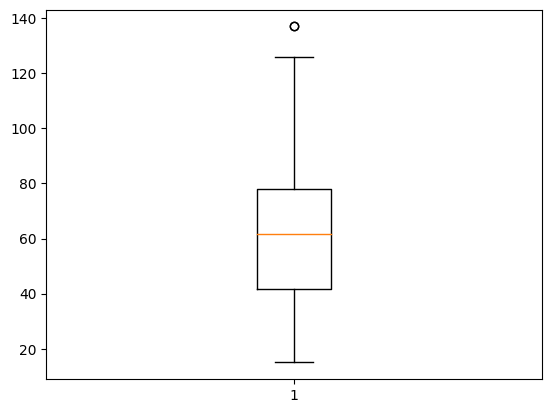

In [98]:
plt.boxplot(df['Annual Income (k$)'])

In [99]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)

In [100]:
iqr=q3-q1

In [101]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [102]:
df.median()

CustomerID                100.5
Gender                      0.0
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [103]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>ul,61.5,df['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a689143e320>,
 'caps': [<matplotlib.lines.Line2D at 0x7a689143e860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a689143e080>],
 'medians': [<matplotlib.lines.Line2D at 0x7a689143eda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a689143f040>],
 'means': []}

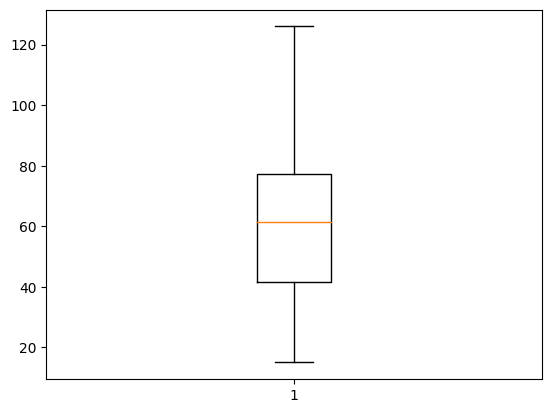

In [104]:
plt.boxplot(df['Annual Income (k$)'])

In [105]:
df.drop('CustomerID',axis=1,inplace=True)

In [106]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x=df.drop('Spending Score (1-100)',axis=1)

In [109]:
y=df['Spending Score (1-100)']

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [111]:
x_train.shape

(140, 3)

In [112]:
x_test.shape

(60, 3)

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn=KNeighborsClassifier()

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
ypred=knn.predict(x_test)

In [117]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [127]:
from sklearn.metrics import classification_report,confusion_matrix

In [125]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [129]:
confusion_matrix(y_test,ypred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])